In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Importing the Data

In [2]:
payouts_df = pd.read_csv('payouts.csv')
payouts_df.head()

,date,platform_id,recipient_id,count,amount
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.0
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.0
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.0
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.0
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.0


In [3]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,merchant_id,country
0,id_ace715763434d4fd4eda58c9e9d692c6,FR
1,id_717b4a0f74912f18146c0708b330a3d9,US
2,id_671fd54bccd294b502fea89c0cc5a690,US
3,id_d8ed94b4e446b868e38efa8efa34b702,FR
4,id_1a054e523cbf203b16b38fc3e5b19b25,US


In [4]:
industries_df =  pd.read_csv('industries.csv')
industries_df.head()

,merchant_id,industry
0,id_ace715763434d4fd4eda58c9e9d692c6,Travel & Hospitality
1,id_717b4a0f74912f18146c0708b330a3d9,Food & Beverage
2,id_671fd54bccd294b502fea89c0cc5a690,Professional Services (non-medical)
3,id_d8ed94b4e446b868e38efa8efa34b702,Travel & Hospitality
4,id_1a054e523cbf203b16b38fc3e5b19b25,Professional Services (non-medical)


# Data Cleaning

In [5]:
# Check for missing values in each dataset
print(payouts_df.isnull().sum())
print(countries_df.isnull().sum())
print(industries_df.isnull().sum())

date            0
platform_id     0
recipient_id    0
count           0
amount          0
dtype: int64
merchant_id    0
country        0
dtype: int64
merchant_id    0
industry       1
dtype: int64


In [6]:
#dropping the row in 'industries.csv' with empty value for 'industry'
industries_df.dropna(subset=['industry'], inplace=True) 

In [7]:
payouts_df = payouts_df.drop_duplicates()
countries_df = countries_df.drop_duplicates()
industries_df = industries_df.drop_duplicates()

In [8]:
# Ensuring data types for merging
payouts_df['platform_id'] = payouts_df['platform_id'].astype(str)
payouts_df['recipient_id'] = payouts_df['recipient_id'].astype(str)
countries_df['merchant_id'] = countries_df['merchant_id'].astype(str)
industries_df['merchant_id'] = industries_df['merchant_id'].astype(str)

# Merging the payouts data with the countries data
# Assuming 'merchant_id' in countries_df can relate to both 'platform_id' and 'recipient_id' in payouts_df,
# but for this analysis, we'll focus on recipients to determine the country of payout destination.
payouts_industries_df = pd.merge(payouts_df, industries_df, how='inner', left_on='platform_id', right_on='merchant_id')
payouts_countries_df = pd.merge(payouts_df, countries_df, how='inner', left_on='recipient_id', right_on='merchant_id')
# Merging the resulting dataframe with the industries data
# Similarly, assuming the industry can relate to both platform and recipient,
# we'll attribute industry based on the recipient for this analysis.
final_df = pd.merge(payouts_industries_df, countries_df, how='inner', left_on='recipient_id', right_on='merchant_id', suffixes=('_country', '_industry'))
final_df.head()

,date,platform_id,recipient_id,count,amount,merchant_id_country,industry,merchant_id_industry,country
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.0,id_5dded1fc8ff3f8c0d96019076394d2a7,"Tickets: concerts,sports,movies,conventions",id_23d90ec275370c686dedd7dc1c5e93b3,US
1,2018-05-23 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,57061.0,id_5dded1fc8ff3f8c0d96019076394d2a7,"Tickets: concerts,sports,movies,conventions",id_23d90ec275370c686dedd7dc1c5e93b3,US
2,2018-09-18 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,59220.0,id_5dded1fc8ff3f8c0d96019076394d2a7,"Tickets: concerts,sports,movies,conventions",id_23d90ec275370c686dedd7dc1c5e93b3,US
3,2018-07-29 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,50361.0,id_5dded1fc8ff3f8c0d96019076394d2a7,"Tickets: concerts,sports,movies,conventions",id_23d90ec275370c686dedd7dc1c5e93b3,US
4,2018-06-05 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,10791.0,id_5dded1fc8ff3f8c0d96019076394d2a7,"Tickets: concerts,sports,movies,conventions",id_23d90ec275370c686dedd7dc1c5e93b3,US


In [10]:
final_df.drop(columns = ['platform_id','recipient_id', 'merchant_id_country','merchant_id_industry'], inplace = True)
final_df.head()

,date,count,amount,industry,country
0,2018-05-16 00:00:00+00:00,1,9786.0,"Tickets: concerts,sports,movies,conventions",US
1,2018-05-23 00:00:00+00:00,1,57061.0,"Tickets: concerts,sports,movies,conventions",US
2,2018-09-18 00:00:00+00:00,1,59220.0,"Tickets: concerts,sports,movies,conventions",US
3,2018-07-29 00:00:00+00:00,1,50361.0,"Tickets: concerts,sports,movies,conventions",US
4,2018-06-05 00:00:00+00:00,1,10791.0,"Tickets: concerts,sports,movies,conventions",US


In [12]:
final_df.drop(columns = ['count'], inplace = True)

In [13]:
final_df.to_csv('final_merged_data_stripe.csv')

In [17]:
final_df.sort_values(by=['date'])

,date,amount,industry,country
148797,2018-01-01 00:00:00+00:00,9394.0,"Tickets: concerts,sports,movies,conventions",US
1157251,2018-01-01 00:00:00+00:00,43068.0,Other Services,FR
208481,2018-01-01 00:00:00+00:00,113935.0,"Tickets: concerts,sports,movies,conventions",US
368177,2018-01-01 00:00:00+00:00,44803.0,"Tickets: concerts,sports,movies,conventions",US
113558,2018-01-01 00:00:00+00:00,12425.0,"Tickets: concerts,sports,movies,conventions",US
...,...,...,...,...
1290384,2018-12-31 00:00:00+00:00,15287.0,Travel & Hospitality,FR
1361401,2018-12-31 00:00:00+00:00,9959.0,Travel & Hospitality,FR
1361402,2018-12-31 00:00:00+00:00,95138.0,Travel & Hospitality,FR
528487,2018-12-31 00:00:00+00:00,4126.0,"Tickets: concerts,sports,movies,conventions",IT


In [28]:

# Ensure 'date' is in datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

final_df['date'] = final_df['date'].dt.date

# Group by 'date' and 'country', then sum the 'amount'
total_payout_per_day_country = final_df.groupby(['date', 'country'])['amount'].sum().reset_index()

# Sort the result for better readability
total_payout_per_day_country = total_payout_per_day_country.sort_values(by=['country', 'date'])

# This will give you a DataFrame with 'date', 'country', and the total 'amount' (payout) for that day.
print(total_payout_per_day_country)


            date country       amount
0     2018-01-01      AT       2487.0
18    2018-01-02      AT     144687.0
35    2018-01-03      AT      47083.0
51    2018-01-04      AT      27541.0
70    2018-01-05      AT      21491.0
...          ...     ...          ...
7653  2018-12-27      US  269229784.0
7677  2018-12-28      US  294093905.0
7701  2018-12-29      US  194744842.0
7725  2018-12-30      US  325127788.0
7750  2018-12-31      US  353693157.0

[7751 rows x 3 columns]


In [29]:
total_payout_per_day_country.to_csv('total_payout_per_day_country.csv')

In [30]:
total_payout_per_day_country.country.unique()

array(['AT', 'AU', 'BE', 'BR', 'CA', 'CH', 'DE', 'DK', 'ES', 'FI', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'PT',
       'SE', 'SG', 'US'], dtype=object)

In [36]:
AT = total_payout_per_day_country.loc[total_payout_per_day_country["country"] == "AT"]
AT

,date,country,amount
0,2018-01-01,AT,2487.0
18,2018-01-02,AT,144687.0
35,2018-01-03,AT,47083.0
51,2018-01-04,AT,27541.0
70,2018-01-05,AT,21491.0
...,...,...,...
7630,2018-12-27,AT,40012.0
7654,2018-12-28,AT,40790.0
7678,2018-12-29,AT,17431.0
7702,2018-12-30,AT,12722.0


# LINEAR REGRESSION

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert 'date' to a numerical feature by using the number of days since the first date in the dataset
AT['date_ordinal'] = (AT['date'] - AT['date'].min()).dt.days

# Define the feature and target variable
X = AT[['date_ordinal']]  # Features
y = AT['amount']          # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Combine actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df['date'] = X_test['date_ordinal'].apply(lambda x: AT['date'].min() + pd.Timedelta(days=x))
comparison_df.sort_values(by='date', inplace=True)

# The mean squared error and the coefficient of determination
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean squared error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print('Coefficient of determination (R^2): %.2f' % r2)

# Return the comparison DataFrame
comparison_df


Mean squared error (MSE): 17059454659.44
Root Mean Squared Error (RMSE): 130611.85
Coefficient of determination (R^2): 0.17


/var/folders/5d/162czv054h71tcxgybncx7600000gn/T/ipykernel_15700/3371764300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AT['date_ordinal'] = (AT['date'] - AT['date'].min()).dt.days


,Actual,Predicted,date
130,60018.0,-5114.783006,2018-01-08
383,71763.0,4786.164432,2018-01-22
653,76449.0,14687.111870,2018-02-05
671,47806.0,15394.322402,2018-02-06
747,4387.0,18223.164527,2018-02-10
...,...,...,...
7347,24576.0,236044.008161,2018-12-15
7395,99935.0,237458.429224,2018-12-17
7468,71038.0,239580.060818,2018-12-20
7702,12722.0,246652.166131,2018-12-30


In [42]:
y_test

7229    117258.0
383      71763.0
1645     24361.0
1148      4309.0
4832    150665.0
          ...   
5817     55653.0
7468     71038.0
934      43517.0
7726    197045.0
7063    433649.0
Name: amount, Length: 67, dtype: float64

In [43]:
X_test

,date_ordinal
7229,343
383,21
1645,87
1148,61
4832,238
...,...
5817,282
7468,353
934,50
7726,364


In [44]:
AT = final_df.loc[final_df["country"]=="AT"]
AT

,date,amount,industry,country
399301,2018-12-22,9719.0,"Tickets: concerts,sports,movies,conventions",AT
399302,2018-10-12,31481.0,"Tickets: concerts,sports,movies,conventions",AT
399303,2018-08-08,14380.0,"Tickets: concerts,sports,movies,conventions",AT
399304,2018-09-07,13822.0,"Tickets: concerts,sports,movies,conventions",AT
399305,2018-07-10,23275.0,"Tickets: concerts,sports,movies,conventions",AT
...,...,...,...,...
1606050,2018-07-18,3709.0,Retail Fashion,AT
1606051,2018-06-09,6335.0,Retail Fashion,AT
1606052,2018-07-13,9540.0,Retail Fashion,AT
1606476,2018-10-31,22038.0,Other Software & Content,AT


In [47]:
AT.sort_values(by= ["date"])

,date,amount,industry,country
864224,2018-01-01,2348.0,Other Software & Content,AT
865878,2018-01-01,139.0,Other Software & Content,AT
1361111,2018-01-02,27374.0,Travel & Hospitality,AT
1351019,2018-01-02,4558.0,Travel & Hospitality,AT
1327283,2018-01-02,6152.0,Travel & Hospitality,AT
...,...,...,...,...
1357541,2018-12-31,7284.0,Travel & Hospitality,AT
1359053,2018-12-31,32363.0,Travel & Hospitality,AT
1359217,2018-12-31,3871.0,Travel & Hospitality,AT
1336449,2018-12-31,3785.0,Travel & Hospitality,AT


In [48]:
AT.industry.unique()

array(['Other Software & Content', 'Travel & Hospitality',
       'Retail Fashion', 'Tickets: concerts,sports,movies,conventions',
       'Content'], dtype=object)

In [58]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Perform one-hot encoding on the 'industry' column
AT_encoded = pd.get_dummies(AT, columns=['industry'],dtype=int)

# Now df_encoded will have additional columns for each unique value in the 'industry' column
AT_encoded

,date,amount,country,industry_Content,industry_Other Software & Content,industry_Retail Fashion,"industry_Tickets: concerts,sports,movies,conventions",industry_Travel & Hospitality
864224,2018-01-01,2348.0,AT,0,1,0,0,0
865878,2018-01-01,139.0,AT,0,1,0,0,0
864250,2018-01-02,2104.0,AT,0,1,0,0,0
1350169,2018-01-02,5959.0,AT,0,0,0,0,1
1340575,2018-01-02,19176.0,AT,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1314661,2018-12-31,12227.0,AT,0,0,0,0,1
1338311,2018-12-31,4500.0,AT,0,0,0,0,1
1606028,2018-12-31,93150.0,AT,0,0,1,0,0
1324441,2018-12-31,15226.0,AT,0,0,0,0,1


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import numpy as np

# Load your DataFrame here
# AT_encoded = pd.read_csv('path_to_your_csv.csv') # Replace with your DataFrame

# Convert 'date' to a numerical feature
AT_encoded['date_ordinal'] = pd.to_datetime(AT_encoded['date']).apply(lambda x: x.toordinal())

# Define features and target variable
X = AT_encoded.drop(columns=['date', 'amount', 'country'])  # Features (excluding 'date', 'amount', and 'country')
y = AT_encoded['amount']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [65]:
# Predict the 'amount' for the testing set
y_pred = model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.reset_index(drop=True, inplace=True)

# Print the metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Coefficient of determination (R^2): {r2}')

# Show the DataFrame with actual vs predicted values
print(results)

Root Mean Squared Error (RMSE): 19289.11077198439
Coefficient of determination (R^2): 0.15326757908247934
      Actual     Predicted
0     3158.0   7212.925877
1     6638.0   8724.431943
2     9581.0   7405.511592
3     4277.0   7300.464839
4     5619.0   8596.041466
..       ...           ...
697  20979.0   8841.150558
698  23191.0   8438.471336
699   2266.0   8275.065275
700   3023.0   7335.480423
701  11333.0  30429.005767

[702 rows x 2 columns]


In [66]:
X_train

,industry_Content,industry_Other Software & Content,industry_Retail Fashion,"industry_Tickets: concerts,sports,movies,conventions",industry_Travel & Hospitality,date_ordinal
1292333,0,0,0,0,1,736839
1606002,0,0,1,0,0,736845
1284450,0,0,0,0,1,736825
556330,1,0,0,0,0,736948
556543,1,0,0,0,0,737004
...,...,...,...,...,...,...
399347,0,0,0,1,0,736888
399395,0,0,0,1,0,736894
1328389,0,0,0,0,1,736916
1287801,0,0,0,0,1,736858


In [67]:
AT_encoded

,date,amount,country,industry_Content,industry_Other Software & Content,industry_Retail Fashion,"industry_Tickets: concerts,sports,movies,conventions",industry_Travel & Hospitality,date_ordinal
864224,2018-01-01,2348.0,AT,0,1,0,0,0,736695
865878,2018-01-01,139.0,AT,0,1,0,0,0,736695
864250,2018-01-02,2104.0,AT,0,1,0,0,0,736696
1350169,2018-01-02,5959.0,AT,0,0,0,0,1,736696
1340575,2018-01-02,19176.0,AT,0,0,0,0,1,736696
...,...,...,...,...,...,...,...,...,...
1314661,2018-12-31,12227.0,AT,0,0,0,0,1,737059
1338311,2018-12-31,4500.0,AT,0,0,0,0,1,737059
1606028,2018-12-31,93150.0,AT,0,0,1,0,0,737059
1324441,2018-12-31,15226.0,AT,0,0,0,0,1,737059


In [70]:
import pandas as pd
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your DataFrame here
# df = pd.read_csv('path_to_your_csv.csv')  # Replace with the actual loading code

# One-hot encode the 'industry' column
AT_encoded = pd.get_dummies(AT, columns=['industry'], drop_first=True, dtype = int)

# Convert 'date' to datetime and sort the DataFrame
AT_encoded['date'] = pd.to_datetime(AT_encoded['date'])
AT_encoded.sort_values('date', inplace=True)

# Aggregate the data by day
AT_daily = AT_encoded.groupby('date').agg({'amount': 'sum', **{col: 'max' for col in AT_encoded.columns if col.startswith('industry_')}})

# Define features (X) as the one-hot encoded columns and the target (y) as the amount
X = AT_daily.drop('amount', axis=1)
y = AT_daily['amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12)  # Here, we're taking the last 12 data points as the test set

# Fit auto_arima to find the best ARIMA model, using the industry columns as exogenous variables
model = auto_arima(y_train, X=X_train, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# Summarize the ARIMA model
model.summary()

# Make predictions
predictions = model.predict(n_periods=len(y_test), X=X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE: {rmse}')

# Create a DataFrame with actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
print(results)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8661.812, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8839.020, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8772.040, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8667.482, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10352.427, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8652.718, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8665.184, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8668.367, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8671.023, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8670.652, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8664.926, Time=0.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8664.552, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8644.121, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8645.907, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]         

/Users/shalinidutta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/shalinidutta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [71]:
final_df

,date,amount,industry,country
0,2018-05-16,9786.0,"Tickets: concerts,sports,movies,conventions",US
1,2018-05-23,57061.0,"Tickets: concerts,sports,movies,conventions",US
2,2018-09-18,59220.0,"Tickets: concerts,sports,movies,conventions",US
3,2018-07-29,50361.0,"Tickets: concerts,sports,movies,conventions",US
4,2018-06-05,10791.0,"Tickets: concerts,sports,movies,conventions",US
...,...,...,...,...
1609434,2018-01-31,200561.0,Other Software & Content,US
1609435,2018-03-18,2495.0,Retail Fashion,US
1609436,2018-07-29,6137.0,Retail Fashion,US
1609437,2018-03-20,1022.0,Other Services,ES


In [75]:


# Convert the 'date' column to datetime
payouts_df['date'] = pd.to_datetime(payouts_df['date'])

# Now let's proceed with Step 3.
# First, we'll join the payouts_df with countries_df to associate each payout with a country.

# Join payouts_df with countries_df
#payouts_with_countries = pd.merge(payouts_df, countries_df, left_on='platform_id', right_on='merchant_id')

# Calculate the total payout amount per country
total_payouts_by_country = final_df.groupby('country')['amount'].sum().reset_index()

# Calculate the number of days in the dataset to find the daily average
# This will be the difference between the last date in the dataset and the first, plus one.
num_days = (payouts_df['date'].max() - payouts_df['date'].min()).days + 1

# Calculate the daily average payout per country
daily_avg_payouts_by_country = total_payouts_by_country.copy()
daily_avg_payouts_by_country['daily_average'] = daily_avg_payouts_by_country['amount'] / num_days

# Estimate payouts on Jan 1, 2019 based on the daily average
daily_avg_payouts_by_country['estimated_payout_jan_1'] = daily_avg_payouts_by_country['daily_average']

# Display the estimated payouts for Jan 1, 2019
estimated_payouts_jan_1 = daily_avg_payouts_by_country[['country', 'estimated_payout_jan_1']]
estimated_payouts_jan_1



,country,estimated_payout_jan_1
0,AT,1.083443e+05
1,AU,2.890202e+06
2,BE,3.975042e+05
3,BR,2.761619e+05
4,CA,5.937636e+06
5,CH,5.964665e+04
6,DE,5.901281e+05
7,DK,1.249890e+05
8,ES,7.096723e+05
9,FI,2.592903e+05


In [74]:
total_payouts_by_country

,country,amount
0,AT,3.954566e+07
1,AU,1.054924e+09
2,BE,1.450890e+08
3,BR,1.007991e+08
4,CA,2.167237e+09
5,CH,2.177103e+07
6,DE,2.153968e+08
7,DK,4.562097e+07
8,ES,2.590304e+08
9,FI,9.464095e+07


In [76]:
num_days

365

In [77]:
daily_avg_payouts_by_country

,country,amount,daily_average,estimated_payout_jan_1
0,AT,3.954566e+07,1.083443e+05,1.083443e+05
1,AU,1.054924e+09,2.890202e+06,2.890202e+06
2,BE,1.450890e+08,3.975042e+05,3.975042e+05
3,BR,1.007991e+08,2.761619e+05,2.761619e+05
4,CA,2.167237e+09,5.937636e+06,5.937636e+06
5,CH,2.177103e+07,5.964665e+04,5.964665e+04
6,DE,2.153968e+08,5.901281e+05,5.901281e+05
7,DK,4.562097e+07,1.249890e+05,1.249890e+05
8,ES,2.590304e+08,7.096723e+05,7.096723e+05
9,FI,9.464095e+07,2.592903e+05,2.592903e+05


In [80]:
import pandas as pd

# Assuming payouts_df, countries_df, and industries_df are already loaded and the 'date' column in payouts_df is converted to datetime

# Join payouts_df with countries_df to associate each payout with a country
#payouts_with_countries = pd.merge(payouts_df, countries_df, left_on='platform_id', right_on='merchant_id')

# Join the above with industries_df to associate each payout with an industry
#payouts_with_countries_industries = pd.merge(payouts_with_countries, industries_df, left_on='platform_id', right_on='merchant_id')

# Calculate the total payout amount per country and industry
total_payouts_by_country_industry = final_df.groupby(['country', 'industry'])['amount'].sum().reset_index()

# Calculate the number of days in the dataset to find the daily average
num_days = (payouts_df['date'].max() - payouts_df['date'].min()).days + 1

# Calculate the daily average payout per country and industry
daily_avg_payouts_by_country_industry = total_payouts_by_country_industry.copy()
daily_avg_payouts_by_country_industry['daily_average'] = daily_avg_payouts_by_country_industry['amount'] / num_days

# Estimate payouts on Jan 1, 2019, based on the daily average
daily_avg_payouts_by_country_industry['estimated_payout_jan_1'] = daily_avg_payouts_by_country_industry['daily_average']

# Display the estimated payouts for Jan 1, 2019, for each country and industry
estimated_payouts_jan_1 = daily_avg_payouts_by_country_industry[['country', 'industry', 'estimated_payout_jan_1']]
estimate = estimated_payouts_jan_1.groupby(['country'])['estimated_payout_jan_1'].sum().reset_index()
estimate


,country,estimated_payout_jan_1
0,AT,1.083443e+05
1,AU,2.890202e+06
2,BE,3.975042e+05
3,BR,2.761619e+05
4,CA,5.937636e+06
5,CH,5.964665e+04
6,DE,5.901281e+05
7,DK,1.249890e+05
8,ES,7.096723e+05
9,FI,2.592903e+05


In [82]:
# Calculate the daily average payout per industry
daily_totals = final_df.groupby(['industry', final_df['date']])['amount'].sum()
daily_averages = daily_totals.groupby('industry').mean()

# Expected number of platforms per industry in 2019
platforms_2019 = {
    'Education': 15,
    'Hotels, Restaurants & Leisure': 5,
    'Food & Beverage': 40
}

# Calculate the expected daily payout volume for each industry
expected_payouts_2019 = {}

for industry, platforms in platforms_2019.items():
    # Get the historical daily average payout for the industry
    historical_avg_payout = daily_averages.get(industry, 0)
    
    # Estimate the expected payout by multiplying the average by the number of platforms
    expected_payout = historical_avg_payout * platforms
    
    # Store the result
    expected_payouts_2019[industry] = expected_payout

# Calculate the total expected payout volume across the three industries
total_expected_payout_2019 = sum(expected_payouts_2019.values())

# Display the results
print(f"Expected total payout volume on a typical day in 2019:")
for industry, payout in expected_payouts_2019.items():
    print(f"{industry}: {payout}")
print(f"Total across the three industries: {total_expected_payout_2019:.2f}")


Expected total payout volume on a typical day in 2019:
Education: 123242808.88579386
Hotels, Restaurants & Leisure: 0
Food & Beverage: 460854030.5753425
Total across the three industries: 584096839.46


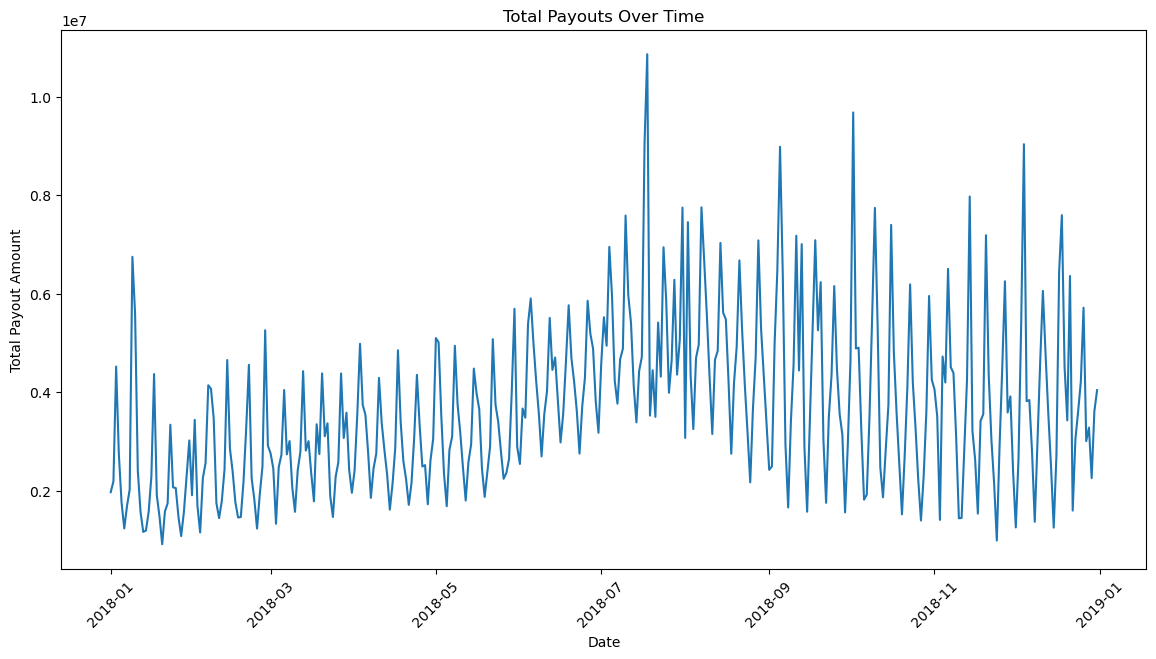

In [83]:
# Before we proceed with trend analysis, we need to prepare the merged DataFrame again
# Join payouts_df with countries_df on 'platform_id' to 'merchant_id'
# Note that we do not have the actual 'merchant_id' column based on the images provided
# This is a placeholder merge command assuming the 'merchant_id' column is present in countries_df
# Additionally, it assumes that platform_id in payouts_df corresponds to merchant_id in countries_df

# Merge payouts_df with countries_df to associate payouts with countries
payouts_with_countries = pd.merge(payouts_df, countries_df, left_on='platform_id', right_on='merchant_id', how='left')

# Convert the 'amount' to actual currency from cents
payouts_with_countries['amount'] = payouts_with_countries['amount'] / 100

# Group by 'country' and 'date' and sum the amounts
country_date_grouped = payouts_with_countries.groupby(['country', payouts_with_countries['date'].dt.date])['amount'].sum().reset_index()

# Calculate the daily average payout for each country
country_daily_average = country_date_grouped.groupby('country')['amount'].mean().reset_index()

# In order to estimate the payouts for Jan 1, 2019, we could use different approaches:
# 1. A simple one would be to assume the average daily payout for each country continues.
# 2. A more complex one would involve time series analysis and forecasting, which we can perform if the data shows a trend or seasonality.

# Let's first visualize the trend over time for the given data.
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by date across all countries
date_aggregated = country_date_grouped.groupby('date')['amount'].sum().reset_index()

# Plot the data to visualize trends
plt.figure(figsize=(14,7))
sns.lineplot(data=date_aggregated, x='date', y='amount')
plt.title('Total Payouts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Payout Amount')
plt.xticks(rotation=45)
plt.show()

# If the plot shows a clear trend or seasonality, we would then use a time series model


In [85]:
payouts_df['count'].unique()

array([ 1,  2,  3,  6, 11,  4,  5,  8,  7,  9, 35, 13, 10, 83, 27, 15, 12,
       14, 16, 20, 21, 28, 22, 23, 19, 26, 44, 17, 34, 18, 54, 50, 31, 37,
       52, 25, 33, 24, 47, 29, 32, 51, 36, 40, 30, 60, 57, 38, 42])